In [1]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
from sklearn.preprocessing import MinMaxScaler  # 0.0 ~ 1.0 사이로 스케일링
from sklearn.preprocessing import LabelEncoder  # String ==> int
from sklearn.model_selection import train_test_split

In [4]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
from keras.utils import np_utils

In [6]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [7]:
names = ['sl', 'sw', 'pl', 'pw', 'class']

In [8]:
df = pd.read_csv('datasets/iris.data', names=names)

In [9]:
df

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df.shape

(150, 5)

In [11]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
Y_encoded = LabelEncoder().fit_transform(df['class'])
# 'Iris-setosa' ==> 0, 'Iris-versicolor' ==> 1, 'Iris-virginica' ==> 2

In [13]:
Y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
Y = np_utils.to_categorical(Y_encoded)  # One Hot Encoding
# 0 ==> [1,0,0], 1 ==> [0,1,0], 2 ==> [0,0,1]

In [15]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [16]:
X = df.drop('class', axis=1)

In [17]:
X

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [19]:
check_pointer = ModelCheckpoint(filepath='iris_model.h5', monitor='val_loss',
                               verbose=1, save_best_only=True)

In [20]:
early_stoper = EarlyStopping(monitor='val_loss', patience=3)

In [21]:
model = Sequential()

In [22]:
model.add(Dense(256, activation='relu', input_shape=(4,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 38,403
Trainable params: 38,403
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
%%time
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.1,
                 callbacks=[check_pointer, early_stoper])

Train on 121 samples, validate on 14 samples
Epoch 1/50
121/121 [==============================] - 0s 4ms/step - loss: 1.0442 - acc: 0.4050 - val_loss: 0.8586 - val_acc: 0.6429

Epoch 00001: val_loss improved from inf to 0.85858, saving model to iris_model.h5
Epoch 2/50
121/121 [==============================] - 0s 116us/step - loss: 0.8743 - acc: 0.7438 - val_loss: 0.7625 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.85858 to 0.76249, saving model to iris_model.h5
Epoch 3/50
121/121 [==============================] - 0s 116us/step - loss: 0.7537 - acc: 0.8182 - val_loss: 0.7124 - val_acc: 0.6429

Epoch 00003: val_loss improved from 0.76249 to 0.71237, saving model to iris_model.h5
Epoch 4/50
121/121 [==============================] - 0s 83us/step - loss: 0.6607 - acc: 0.6777 - val_loss: 0.6199 - val_acc: 0.6429

Epoch 00004: val_loss improved from 0.71237 to 0.61991, saving model to iris_model.h5
Epoch 5/50
121/121 [==============================] - 0s 107us/step - loss: 0.

121/121 [==============================] - 0s 91us/step - loss: 0.0971 - acc: 0.9587 - val_loss: 0.0325 - val_acc: 1.0000

Epoch 00039: val_loss improved from 0.03446 to 0.03250, saving model to iris_model.h5
Epoch 40/50
121/121 [==============================] - 0s 107us/step - loss: 0.0830 - acc: 0.9752 - val_loss: 0.0298 - val_acc: 1.0000

Epoch 00040: val_loss improved from 0.03250 to 0.02982, saving model to iris_model.h5
Epoch 41/50
121/121 [==============================] - 0s 99us/step - loss: 0.0845 - acc: 0.9752 - val_loss: 0.0381 - val_acc: 1.0000

Epoch 00041: val_loss did not improve from 0.02982
Epoch 42/50
121/121 [==============================] - 0s 116us/step - loss: 0.0904 - acc: 0.9669 - val_loss: 0.0383 - val_acc: 1.0000

Epoch 00042: val_loss did not improve from 0.02982
Epoch 43/50
121/121 [==============================] - 0s 107us/step - loss: 0.0938 - acc: 0.9587 - val_loss: 0.0273 - val_acc: 1.0000

Epoch 00043: val_loss improved from 0.02982 to 0.02728, savi

In [25]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


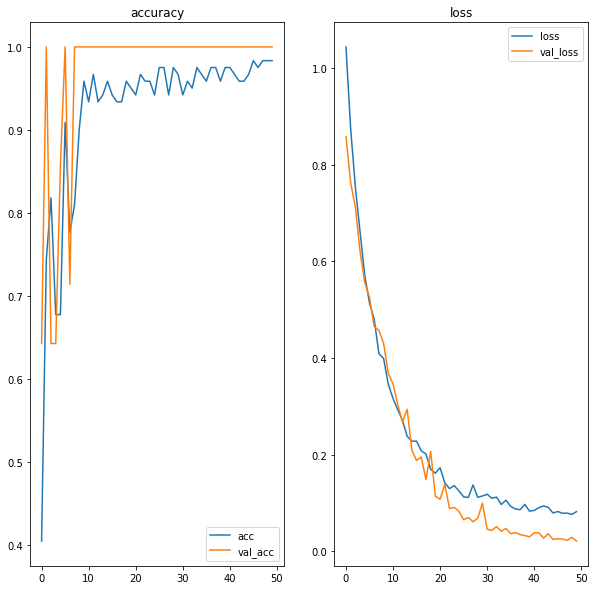

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)  # 121
plt.plot(hist.history['acc'])     # train accuracy
plt.plot(hist.history['val_acc']) # validation accuracy
plt.title('accuracy')
plt.legend(['acc', 'val_acc'])
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])      # train loss
plt.plot(hist.history['val_loss'])  # validation loss
plt.title('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [30]:
loss_score = model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 200us/step


In [31]:
print(loss_score)
# [0.0979449525475502, 0.9333333373069763], [loss, score], 93.3% 정확도

[0.0979449525475502, 0.9333333373069763]


In [32]:
pred = model.predict(X_test)
print(pred)
print(y_test)
print(model.predict_classes(X_test))

[[1.6249028e-04 9.5884269e-01 4.0994763e-02]
 [9.9969828e-01 3.0105843e-04 7.5199381e-07]
 [7.2846090e-11 6.8520480e-05 9.9993145e-01]
 [1.7621274e-04 9.1517156e-01 8.4652223e-02]
 [8.3000588e-05 9.7032255e-01 2.9594427e-02]
 [9.9938250e-01 6.1525818e-04 2.3012913e-06]
 [2.7577179e-03 9.9481755e-01 2.4247051e-03]
 [1.6711831e-06 8.4033899e-02 9.1596437e-01]
 [3.1704851e-05 3.9578709e-01 6.0418123e-01]
 [9.3685806e-04 9.9503398e-01 4.0291497e-03]
 [9.2627261e-06 2.4424881e-01 7.5574195e-01]
 [9.9899977e-01 9.9367683e-04 6.5649683e-06]
 [9.9976391e-01 2.3513402e-04 9.8144153e-07]
 [9.9905390e-01 9.4085105e-04 5.2826053e-06]
 [9.9968195e-01 3.1658701e-04 1.3714174e-06]]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0]


In [34]:
# RNN ==> LSTM 실습 : 비트코인 가격 예측

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
import requests

In [38]:
from keras.models import Sequential

In [39]:
from keras.layers import Dense

In [40]:
from keras.layers import Dropout

In [41]:
from keras.layers import LSTM

In [43]:
url = "https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1405699200&end=9999999999&period=86400"

In [44]:
ret = requests.get(url)  # <Response [200]>
json_data = ret.json()

In [47]:
df_origin = pd.DataFrame(json_data)

In [48]:
df_origin

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000000,225.000000,225.000000,244.000000,4.627631e+01,0.193117,239.627778
1,1424390400,245.000000,240.250000,240.250118,240.250000,5.589490e+01,0.230429,242.568479
2,1424476800,245.000000,245.000000,245.000000,245.000000,1.472224e+01,0.060091,245.000000
3,1424563200,249.000000,235.000000,245.000000,235.000000,1.291212e+02,0.539055,239.532608
4,1424649600,235.001000,235.000000,235.000002,235.000000,9.656756e+01,0.410926,235.000062
...,...,...,...,...,...,...,...,...
2009,1597881600,11878.798593,11672.548482,11757.198800,11856.723407,1.034023e+07,877.129460,11788.721309
2010,1597968000,11878.167814,11494.000000,11853.929574,11527.476424,1.233026e+07,1053.637962,11702.555204
2011,1598054400,11686.455080,11375.126813,11527.446471,11667.369992,7.433553e+06,644.064745,11541.624285
2012,1598140800,11713.941372,11516.580481,11665.725741,11647.230277,6.922739e+06,595.195203,11631.039083


In [49]:
df_origin.to_csv('bitcoin_origin.csv', encoding='utf-8', index=False)

In [50]:
scaler = MinMaxScaler()

In [51]:
df_origin[['close']] = scaler.fit_transform(df_origin[['close']])

In [52]:
df_origin.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000,225.00,225.000000,0.003428,46.276313,0.193117,239.627778
1,1424390400,245.000,240.25,240.250118,0.003231,55.894897,0.230429,242.568479
2,1424476800,245.000,245.00,245.000000,0.003480,14.722239,0.060091,245.000000
3,1424563200,249.000,235.00,245.000000,0.002955,129.121248,0.539055,239.532608
4,1424649600,235.001,235.00,235.000002,0.002955,96.567562,0.410926,235.000062


In [53]:
df_origin.to_csv("bitcoin_scaled.csv", encoding='utf-8', index=False)

In [54]:
del df_origin

In [55]:
df = pd.read_csv("bitcoin_scaled.csv")

In [56]:
df.shape

(2014, 8)

In [58]:
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000,225.00,225.000000,0.003428,46.276313,0.193117,239.627778
1,1424390400,245.000,240.25,240.250118,0.003231,55.894897,0.230429,242.568479
2,1424476800,245.000,245.00,245.000000,0.003480,14.722239,0.060091,245.000000
3,1424563200,249.000,235.00,245.000000,0.002955,129.121248,0.539055,239.532608
4,1424649600,235.001,235.00,235.000002,0.002955,96.567562,0.410926,235.000062


In [59]:
price = df['close']

In [60]:
price

0       0.003428
1       0.003231
2       0.003480
3       0.002955
4       0.002955
          ...   
2009    0.613203
2010    0.595914
2011    0.603260
2012    0.602202
2013    0.604727
Name: close, Length: 2014, dtype: float64

In [61]:
window_size = 5

In [62]:
X = []
Y = []

In [63]:
for i in range(len(price) - window_size):  # 2014 - 5 ==> 2009
    X.append( price.iloc[i:i+window_size] )  # 예) 0:5 ==> 0,1,2,3,4
    Y.append( price.iloc[i+window_size] )    # 예) 0+5 ==> 5

In [64]:
X = np.array(X)
Y = np.array(Y)

In [65]:
X.shape, Y.shape

((2009, 5), (2009,))

In [66]:
X[0]

array([0.00342784, 0.00323093, 0.00348035, 0.00295525, 0.00295525])

In [67]:
Y[0]

0.0032046727572156808

In [69]:
len(X)  # 2009

2009

In [70]:
split_val = len(X) - 200  # 2009 - 200 ==> 1809

In [71]:
X_train = X[:split_val, :]
y_train = Y[:split_val]

In [72]:
X_test = X[split_val:, :]
y_test = Y[split_val:]

In [73]:
X_train.shape, y_train.shape

((1809, 5), (1809,))

In [74]:
X_test.shape, y_test.shape

((200, 5), (200,))

In [75]:
model = Sequential()

In [77]:
model.add(LSTM(128, input_shape=(5, 1)))  # (feature의_수, dimension)
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [78]:
model.compile(loss='mse', optimizer='adam')

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [80]:
%%time
model.fit(X_train, y_train, epochs=3, batch_size=1)

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (1809, 5)